In [52]:
import numpy as np

def DFT_test(x):
    x=np.asarray(x, dtype=float)
    N=x.shape[0]
    n=np.arange(N)
    k=n.reshape((N,1))
    M=np.exp(-2j*np.pi*k*n/N)
    return np.dot(M, x)

In [53]:
x = np.random.random(20)
x

array([0.77709891, 0.31609228, 0.70771494, 0.22277626, 0.79599569,
       0.40589317, 0.80702119, 0.9744428 , 0.96819078, 0.73127626,
       0.49792284, 0.42902401, 0.85179631, 0.7056433 , 0.87856584,
       0.79267899, 0.94696418, 0.07671517, 0.15431169, 0.69882583])

In [54]:
%timeit DFT_test(x)

30.1 µs ± 761 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
%timeit  np.fft.fft(x)

5.96 µs ± 34.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
def FFT(x):
    x=np.asarray(x, dtype=float)
    N=x.shape[0]
    if N <= 32:  # this cutoff should be optimized
        return DFT_test(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi * np.arange(N) / N)
    return np.concatenate([X_even + factor[:N / 2] * X_odd,
                           X_even + factor[N / 2:] * X_odd])

In [59]:
FFT(x)

array([12.73895045+0.00000000e+00j, -1.42786087-1.06048007e-01j,
       -0.72044977+1.50419815e-01j,  1.7563566 -1.21767948e+00j,
        0.43394608+2.46912501e-01j,  1.29450938+8.82127719e-01j,
       -0.1045334 +9.11720251e-01j, -0.69878354+3.17931372e-01j,
       -0.61943653+8.88291601e-01j,  0.4716588 +2.58101289e-01j,
        2.03221431+1.07708474e-14j,  0.4716588 -2.58101289e-01j,
       -0.61943653-8.88291601e-01j, -0.69878354-3.17931372e-01j,
       -0.1045334 -9.11720251e-01j,  1.29450938-8.82127719e-01j,
        0.43394608-2.46912501e-01j,  1.7563566 +1.21767948e+00j,
       -0.72044977-1.50419815e-01j, -1.42786087+1.06048007e-01j])

In [65]:
import pandas as pd
df = pd.read_csv("../DATA/misc/df_res.csv")
df

,Unnamed: 0,t,res
0,0,30.159540,903.915063
1,1,30.308476,764.041059
2,2,30.457412,368.410913
3,3,30.606348,-35.971391
4,4,30.755284,177.904024
...,...,...,...
1807,1807,299.286892,21.978582
1808,1808,299.435828,22.347403
1809,1809,299.584764,68.111620
1810,1810,299.733700,54.519943


/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


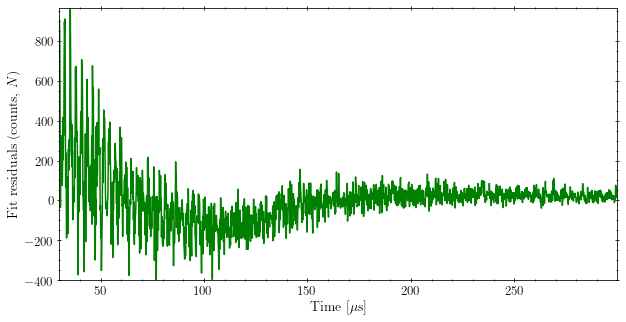

In [68]:
import sys
sys.path.append('../CommonUtils/') # https://github.com/glukicov/EDMTracking/tree/master/CommonUtils
import CommonUtils as cu
fig, ax = cu.plotScatter(df['t'], df['res'], figsize=(10,5))
plt.ylabel(r"Fit residuals (counts, $N$)");
plt.xlabel(r"Time [$\mathrm{\mu}$s]");
plt.savefig("fig/res.png", dpi=300)

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

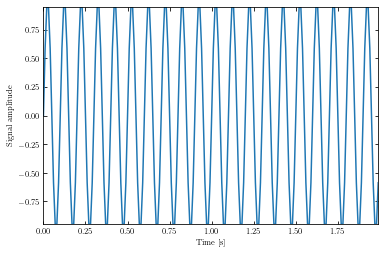

In [71]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/Users/gleb/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

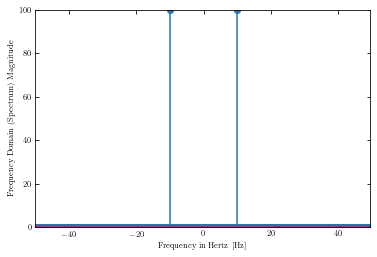

In [77]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
# ax.set_xlim(-f_s / 2, f_s / 2)
# ax.set_ylim(-5, 110)

In [ ]:
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')